## Import libs

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.data import Dataset
import seaborn as sns


from models.unfair_lr.models import UnfairLogisticRegression
from models.unfair_lr.learning import train_loop
from util.evaluation import *
from util.load_data import load_data

## Preliminaries

In [2]:
batch_size = 64
epochs = 100
lr = 0.001

In [3]:
cv_seeds = [13, 29, 42, 55, 73]

## Load data

In [4]:
data_name = 'german'

In [5]:
x, y, a = load_data(data_name)
raw_data = (x, y, a)

In [6]:
xdim = x.shape[1]
ydim = y.shape[1]
adim = a.shape[1]
zdim = 8

## Result file

In [7]:
header = "model_name", "cv_seed", "clas_acc", "dp", "deqodds", "deqopp", "trade_dp", "trade_deqodds", "trade_deqopp", "TN_a0", "FP_a0", "FN_a0", "TP_a0", "TN_a1", "FP_a1", "FN_a1", "TP_a1"
results = []

## Testing

In [8]:
for cv_seed in cv_seeds:
    x_train, x_test, y_train, y_test, a_train, a_test = train_test_split(
        x, y, a, test_size=0.3, random_state=cv_seed)

    train_data = Dataset.from_tensor_slices((x_train, y_train, a_train))
    train_data = train_data.batch(batch_size, drop_remainder=True)

    test_data = Dataset.from_tensor_slices((x_test, y_test, a_test))
    test_data = test_data.batch(batch_size, drop_remainder=True)

    # train below

    model = UnfairLogisticRegression(xdim, ydim, batch_size)
    ret = train_loop(model, train_data, epochs)
    Y, A, Y_hat = evaluation(model, test_data)
    
    clas_acc, dp, deqodds, deqopp, confusion_matrix, metrics_a0, metrics_a1  = compute_metrics(Y, A, Y_hat, adim=adim)
    
    fair_metrics = (dp, deqodds, deqopp)
    
    tradeoff = []
    
    for fair_metric in fair_metrics:
        tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
    
    result = ['UnfairLR-decay', cv_seed, clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]] + metrics_a0 + metrics_a1

    results.append(result)

> Epoch | Class Loss | Class Acc
> 1 | 0.5916500687599182 | 0.6734375
> 2 | 0.589928388595581 | 0.6734375
> 3 | 0.5888773202896118 | 0.6734375
> 4 | 0.5881212949752808 | 0.6734375
> 5 | 0.587532639503479 | 0.6734375
> 6 | 0.5870517492294312 | 0.6734375
> 7 | 0.5866460800170898 | 0.6734375
> 8 | 0.5862957239151001 | 0.6734375
> 9 | 0.5859876871109009 | 0.6734375
> 10 | 0.5857132077217102 | 0.6734375
> 11 | 0.585465669631958 | 0.6734375
> 12 | 0.5852405428886414 | 0.6734375
> 13 | 0.5850341320037842 | 0.6734375
> 14 | 0.5848437547683716 | 0.6734375
> 15 | 0.5846670866012573 | 0.6734375
> 16 | 0.5845022797584534 | 0.6734375
> 17 | 0.5843480229377747 | 0.6734375
> 18 | 0.5842030048370361 | 0.6734375
> 19 | 0.5840661525726318 | 0.6734375
> 20 | 0.5839367508888245 | 0.6734375
> 21 | 0.5838139653205872 | 0.6734375
> 22 | 0.5836971998214722 | 0.6734375
> 23 | 0.5835859775543213 | 0.6734375
> 24 | 0.583479642868042 | 0.6734375
> 25 | 0.5833779573440552 | 0.6734375
> 26 | 0.5832804441452026 | 0.

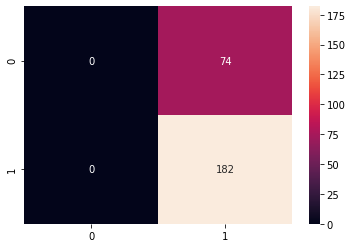

In [9]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [10]:
for cv_seed in cv_seeds:
    x_train, x_test, y_train, y_test, a_train, a_test = train_test_split(
        x, y, a, test_size=0.3, random_state=cv_seed)

    train_data = Dataset.from_tensor_slices((x_train, y_train, a_train))
    train_data = train_data.batch(batch_size, drop_remainder=True)

    test_data = Dataset.from_tensor_slices((x_test, y_test, a_test))
    test_data = test_data.batch(batch_size, drop_remainder=True)

    # train below

    opt = Adam(learning_rate=lr)

    model = UnfairLogisticRegression(xdim, ydim, batch_size)
    ret = train_loop(model, train_data, epochs, opt)
    Y, A, Y_hat = evaluation(model, test_data)
    
    clas_acc, dp, deqodds, deqopp, confusion_matrix, metrics_a0, metrics_a1  = compute_metrics(Y, A, Y_hat, adim=adim)
    
    fair_metrics = (dp, deqodds, deqopp)
    
    tradeoff = []
    
    for fair_metric in fair_metrics:
        tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
    
    result = ['UnfairLR', cv_seed, clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]] + metrics_a0 + metrics_a1

    results.append(result)

    del(opt)

> Epoch | Class Loss | Class Acc
> 1 | 0.5916500687599182 | 0.6734375
> 2 | 0.5883281826972961 | 0.6734375
> 3 | 0.5851278305053711 | 0.6734375
> 4 | 0.5820651054382324 | 0.6734375
> 5 | 0.5791320204734802 | 0.6734375
> 6 | 0.5763149857521057 | 0.6734375
> 7 | 0.5735998153686523 | 0.6734375
> 8 | 0.5709738731384277 | 0.6734375
> 9 | 0.5684264302253723 | 0.6734375
> 10 | 0.5659487247467041 | 0.6734375
> 11 | 0.5635337829589844 | 0.6734375
> 12 | 0.5611760020256042 | 0.6734375
> 13 | 0.5588711500167847 | 0.6734375
> 14 | 0.5566158294677734 | 0.6734375
> 15 | 0.5544074773788452 | 0.6734375
> 16 | 0.5522441864013672 | 0.6734375
> 17 | 0.55012446641922 | 0.6734375
> 18 | 0.5480470061302185 | 0.6734375
> 19 | 0.5460109710693359 | 0.6734375
> 20 | 0.5440154075622559 | 0.6734375
> 21 | 0.5420598983764648 | 0.6734375
> 22 | 0.540143609046936 | 0.675
> 23 | 0.5382660627365112 | 0.675
> 24 | 0.5364266633987427 | 0.675
> 25 | 0.5346249341964722 | 0.6765625
> 26 | 0.5328601598739624 | 0.678125
> 27

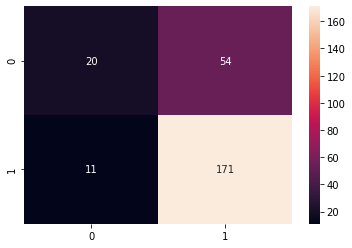

In [11]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

## Saving into DF then CSV

In [12]:
result_df = pd.DataFrame(results, columns=header)
result_df

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,UnfairLR-decay,13,0.734375,1.000000,1.000000,1.000000,0.846847,0.846847,0.846847,0.0,26.0,0.0,58.0,0.0,42.0,0.0,130.0
1,UnfairLR-decay,29,0.660156,1.000000,1.000000,1.000000,0.795294,0.795294,0.795294,0.0,36.0,0.0,43.0,0.0,51.0,0.0,126.0
2,UnfairLR-decay,42,0.710938,1.000000,1.000000,1.000000,0.831050,0.831050,0.831050,0.0,22.0,0.0,52.0,0.0,52.0,0.0,130.0
3,UnfairLR-decay,55,0.695312,1.000000,1.000000,1.000000,0.820276,0.820276,0.820276,0.0,26.0,0.0,57.0,0.0,52.0,0.0,121.0
4,UnfairLR-decay,73,0.710938,1.000000,1.000000,1.000000,0.831050,0.831050,0.831050,0.0,30.0,0.0,49.0,0.0,44.0,0.0,133.0
5,UnfairLR,13,0.710938,0.829457,0.769079,0.939257,0.765638,0.738866,0.809302,16.0,10.0,12.0,46.0,9.0,33.0,19.0,111.0
6,UnfairLR,29,0.699219,0.928771,0.962169,0.947213,0.797811,0.809885,0.804539,10.0,26.0,5.0,38.0,13.0,38.0,8.0,118.0
7,UnfairLR,42,0.707031,0.866201,0.820455,0.934615,0.778564,0.759532,0.805048,9.0,13.0,7.0,45.0,6.0,46.0,9.0,121.0
8,UnfairLR,55,0.718750,0.911275,0.900214,0.935044,0.803643,0.799312,0.812753,9.0,17.0,7.0,50.0,11.0,41.0,7.0,114.0
9,UnfairLR,73,0.746094,0.955446,0.982469,0.970999,0.837891,0.848120,0.843817,8.0,22.0,4.0,45.0,12.0,32.0,7.0,126.0


In [14]:
result_df.to_csv(f'{data_name}-result/unfair_lr-{epochs}.csv')